<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221106.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterator

In [1]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta 
import os
import re

from functools import reduce
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'match_result_test.csv',
 'sample-sales-data.csv',
 'online_retail.xlsx',
 'test.csv',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'sales_vs_discount.csv',
 'online_retail_II.xlsx',
 'groceries.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sales.csv',
 'ecommerce-data.csv',
 'mall_customers.csv',
 'sales_data_with_stores.csv',
 '1_order_payments_dataset.csv',
 'mock_sales_data.csv',
 'sample_data']

In [3]:
df = pd.read_csv('match_result_test.csv')
df.head()

,match_idx,match_type_id,match_rule_id,p1_member_idx,p2_member_idx,match_first_attack,p1_league_level,p2_league_level,p1_match_score,p2_match_score,match_time,match_result
0,10001,2,2_02,12783,11036,win,2,2,79,47,88,win
1,10002,2,2_05,19479,18315,lose,5,5,43,54,139,lost
2,10003,2,2_10,12800,16571,lose,10,10,32,4,78,win
3,10004,2,2_10,12813,10926,lose,10,10,37,58,52,lost
4,10005,2,2_11,17855,16988,win,11,11,52,41,48,win


In [17]:
cnt = df[['p1_league_level', 'match_first_attack', 'match_result', 'match_time']]
cnt.columns = ['league', 'first', 'res', 'time']
cnt['first'] = cnt['first'].apply(lambda x : {'win' : 'p1', 'lose' : 'p2'}.get(x, x))
cnt['flag'] = cnt['first'] + '_' + cnt['res']
cnt.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,league,first,res,time,flag
0,2,p1,win,88,p1_win
1,5,p2,lost,139,p2_lost
2,10,p2,win,78,p2_win
3,10,p2,lost,52,p2_lost
4,11,p1,win,48,p1_win


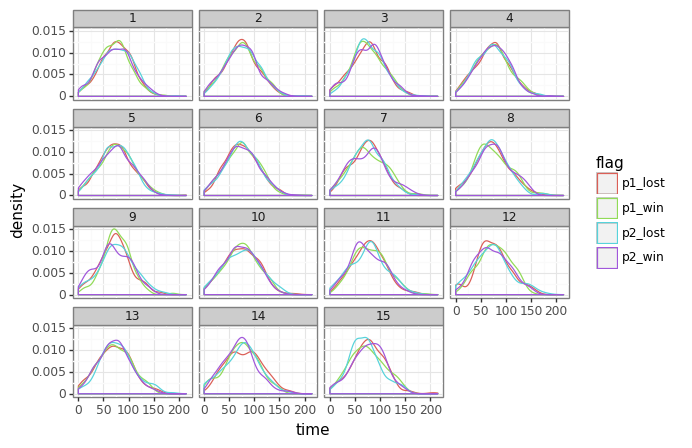

<ggplot: (8757846489853)>

In [18]:
(
    ggplot(cnt, aes('time', color = 'flag')) +
    gg.geom_density() +
    gg.facet_wrap('~league') +
    gg.theme_bw()
)

In [19]:
os.listdir()

['.config',
 'match_result_test.csv',
 'sample-sales-data.csv',
 'online_retail.xlsx',
 'test.csv',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'sales_vs_discount.csv',
 'online_retail_II.xlsx',
 'groceries.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sales.csv',
 'ecommerce-data.csv',
 'mall_customers.csv',
 'sales_data_with_stores.csv',
 '1_order_payments_dataset.csv',
 'mock_sales_data.csv',
 'sample_data']

In [24]:
df = pd.read_csv('sample-sales-data.csv')
df['date'] = df.sales_date.to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df.head()

,store,product,sales_date,sales_qty,sales_rev,date,week
0,1,29790057,2020-03-19,4,42.0,2020-03-19,2020-03-16
1,2,29790057,2020-03-18,1,10.5,2020-03-18,2020-03-16
2,3,29790057,2020-03-16,8,84.0,2020-03-16,2020-03-16
3,4,29790057,2020-03-16,15,157.5,2020-03-16,2020-03-16
4,5,29790057,2020-03-17,28,294.0,2020-03-17,2020-03-16


In [93]:
cnt_product = df[['product']].value_counts().reset_index()
cnt_product.columns = ['product', 'cnt']
cnt_product['ratio'] = cnt_product['cnt'].apply(lambda x : round(x/np.sum(cnt_product['cnt'])*100,2))
cnt_product['product2'] = [str(np.where(a > 0.3, str(b), 'etc') )
                          for a, b in zip(cnt_product['ratio'], cnt_product['product'])]
cnt_product

,product,cnt,ratio,product2
0,30560809,1663,0.74,30560809
1,30619962,1390,0.62,30619962
2,30560805,1314,0.59,30560805
3,30611495,1309,0.58,30611495
4,30589805,1246,0.56,30589805
...,...,...,...,...
871,30539998,1,0.00,etc
872,30591516,1,0.00,etc
873,30719872,1,0.00,etc
874,30539909,1,0.00,etc


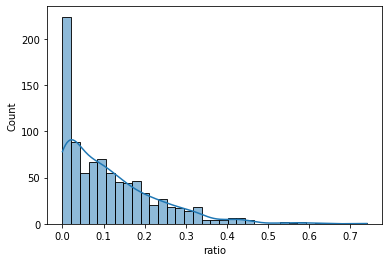

In [94]:
sns.histplot(data = cnt_product, x = 'ratio', kde = True, bins = 35)

In [95]:
df.head()

,store,product,sales_date,sales_qty,sales_rev,date,week
0,1,29790057,2020-03-19,4,42.0,2020-03-19,2020-03-16
1,2,29790057,2020-03-18,1,10.5,2020-03-18,2020-03-16
2,3,29790057,2020-03-16,8,84.0,2020-03-16,2020-03-16
3,4,29790057,2020-03-16,15,157.5,2020-03-16,2020-03-16
4,5,29790057,2020-03-17,28,294.0,2020-03-17,2020-03-16


In [96]:
cnt = pd.merge(df, cnt_product, 'left', 'product')
cnt = cnt[['store', 'date', 'week', 'product','product2','sales_qty', 'sales_rev']]
cnt.head()

,store,date,week,product,product2,sales_qty,sales_rev
0,1,2020-03-19,2020-03-16,29790057,etc,4,42.0
1,2,2020-03-18,2020-03-16,29790057,etc,1,10.5
2,3,2020-03-16,2020-03-16,29790057,etc,8,84.0
3,4,2020-03-16,2020-03-16,29790057,etc,15,157.5
4,5,2020-03-17,2020-03-16,29790057,etc,28,294.0


In [97]:
cnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224229 entries, 0 to 224228
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   store      224229 non-null  int64         
 1   date       224229 non-null  datetime64[ns]
 2   week       224229 non-null  datetime64[ns]
 3   product    224229 non-null  int64         
 4   product2   224229 non-null  object        
 5   sales_qty  224229 non-null  int64         
 6   sales_rev  224229 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 13.7+ MB


In [98]:
cnt = cnt.groupby(['store', 'week', 'product2']).agg({'sales_qty':'sum', 'sales_rev':'sum'}).reset_index()
cnt.head()

,store,week,product2,sales_qty,sales_rev
0,1,2019-12-30,29031794,7,89.25
1,1,2019-12-30,29200331,6,58.26
2,1,2019-12-30,29738601,1,9.50
3,1,2019-12-30,29738602,1,8.50
4,1,2019-12-30,29758966,29,410.70


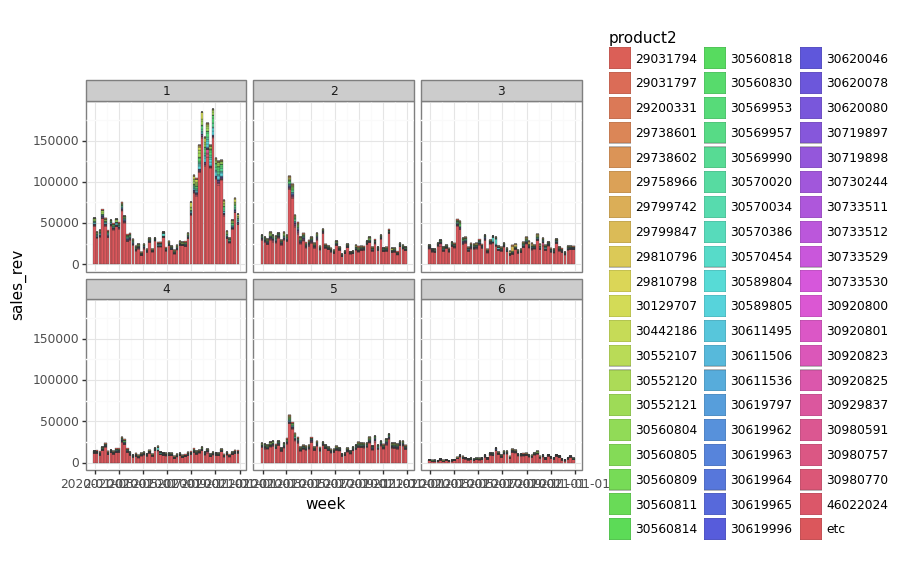

<ggplot: (8757838305061)>

In [99]:
(
    ggplot(cnt, aes('week', 'sales_rev', fill = 'product2')) +
    gg.geom_col(color = '#333333', size = 0.1) +
    gg.facet_wrap('~store') +
    gg.theme_bw()
)

# Iterator

In [100]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [103]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}